<a href="https://colab.research.google.com/github/ApahSaroj/WPI/blob/main/wpi_forecasting_fbprophet_%26_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install pystan

In [2]:
import pandas as pd
import fbprophet
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
df=pd.read_csv('/content/drive/MyDrive/DATA/timeser.csv')

In [7]:
df.head()

,Date,pH,DO,TDS,Alkalinity,EC,Na,Ca,Mg,K,F,Cl,Nitrate,Sulphate,Phosphate,WPI
0,01-Jan-14,8.14,8.7,84.0,52,147.8,4.48,44,20,1.17,0.285,7.8,0.758000,6.534660,0.06211,0.249528
1,02-Jan-14,7.70,8.8,110.0,76,188.0,8.61,44,36,3.46,0.401,14.8,0.196062,8.138620,0.00960,0.216400
2,03-Jan-14,7.60,7.5,75.0,44,128.0,8.11,28,20,2.80,0.379,14.8,0.298875,3.855625,0.01280,0.183814
3,04-Jan-14,8.20,9.1,76.0,56,127.0,6.30,44,18,1.65,0.396,9.6,0.299591,2.238750,0.01536,0.219282
4,05-Jan-14,7.31,7.3,84.0,52,140.0,5.50,28,20,1.61,0.265,8.3,0.106000,5.600000,0.01000,0.165831


In [9]:
df=df.drop(['pH','DO','TDS','Alkalinity',	'EC',	'Na',	'Ca',	'Mg',	'K',	'F',	'Cl',	'Nitrate',	'Sulphate',	'Phosphate'], axis = 1)

In [10]:
df.head()

,Date,WPI
0,01-Jan-14,0.249528
1,02-Jan-14,0.216400
2,03-Jan-14,0.183814
3,04-Jan-14,0.219282
4,05-Jan-14,0.165831


In [11]:
df.tail()

,Date,WPI
482,28-Apr-15,0.419630
483,29-Apr-15,0.432996
484,30-Apr-15,0.326811
485,01-May-15,0.509970
486,02-May-15,0.422551


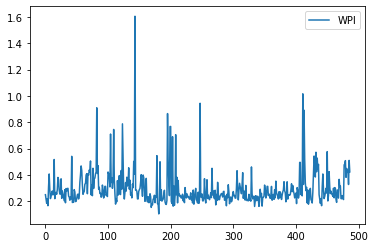

In [12]:
df.plot()

In [13]:
df.columns = ['ds','y']
df.head()

,ds,y
0,01-Jan-14,0.249528
1,02-Jan-14,0.216400
2,03-Jan-14,0.183814
3,04-Jan-14,0.219282
4,05-Jan-14,0.165831


In [14]:
df['ds'] = pd.to_datetime(df['ds'])

In [15]:
df.head()

,ds,y
0,2014-01-01,0.249528
1,2014-01-02,0.216400
2,2014-01-03,0.183814
3,2014-01-04,0.219282
4,2014-01-05,0.165831


In [16]:
from fbprophet import Prophet

In [17]:
dir(Prophet)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_load_stan_backend',
 'add_country_holidays',
 'add_group_component',
 'add_regressor',
 'add_seasonality',
 'construct_holiday_dataframe',
 'fit',
 'flat_growth_init',
 'flat_trend',
 'fourier_series',
 'initialize_scales',
 'linear_growth_init',
 'logistic_growth_init',
 'make_all_seasonality_features',
 'make_future_dataframe',
 'make_holiday_features',
 'make_seasonality_features',
 'parse_seasonality_args',
 'percentile',
 'piecewise_linear',
 'piecewise_logistic',
 'plot',
 'plot_components',
 'predict',
 'predict_seasonal_components',
 'predict_trend',
 'predict_uncertainty',
 'predictive_samples',
 'regressor_col

In [18]:
# Initialize the Model
model=Prophet()

In [19]:
df.columns

Index(['ds', 'y'], dtype='object')

In [20]:
df.dropna(axis=0,inplace=True)

INFO:numexpr.utils:NumExpr defaulting to 2 threads.


In [21]:
df.head()

,ds,y
0,2014-01-01,0.249528
1,2014-01-02,0.216400
2,2014-01-03,0.183814
3,2014-01-04,0.219282
4,2014-01-05,0.165831


In [22]:
model.fit(df)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [23]:
model.component_modes

{'additive': ['weekly',
  'additive_terms',
  'extra_regressors_additive',
  'holidays'],
 'multiplicative': ['multiplicative_terms', 'extra_regressors_multiplicative']}

In [24]:
df.tail()

,ds,y
482,2015-04-28,0.419630
483,2015-04-29,0.432996
484,2015-04-30,0.326811
485,2015-05-01,0.509970
486,2015-05-02,0.422551


In [25]:
### Create future dates of 365 days
future_dates=model.make_future_dataframe(periods=365)

In [26]:
future_dates.tail()

,ds
847,2016-04-27
848,2016-04-28
849,2016-04-29
850,2016-04-30
851,2016-05-01


In [27]:
prediction=model.predict(future_dates)

In [28]:
prediction.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2014-01-01,0.298238,0.149753,0.490803,0.298238,0.298238,0.017688,0.017688,0.017688,0.017688,0.017688,0.017688,0.0,0.0,0.0,0.315926
1,2014-01-02,0.298437,0.141078,0.467224,0.298437,0.298437,-0.011503,-0.011503,-0.011503,-0.011503,-0.011503,-0.011503,0.0,0.0,0.0,0.286934
2,2014-01-03,0.298636,0.143997,0.476576,0.298636,0.298636,0.010414,0.010414,0.010414,0.010414,0.010414,0.010414,0.0,0.0,0.0,0.309050
3,2014-01-04,0.298835,0.138050,0.471981,0.298835,0.298835,0.005330,0.005330,0.005330,0.005330,0.005330,0.005330,0.0,0.0,0.0,0.304165
4,2014-01-05,0.299034,0.109727,0.456432,0.299034,0.299034,-0.013823,-0.013823,-0.013823,-0.013823,-0.013823,-0.013823,0.0,0.0,0.0,0.285211


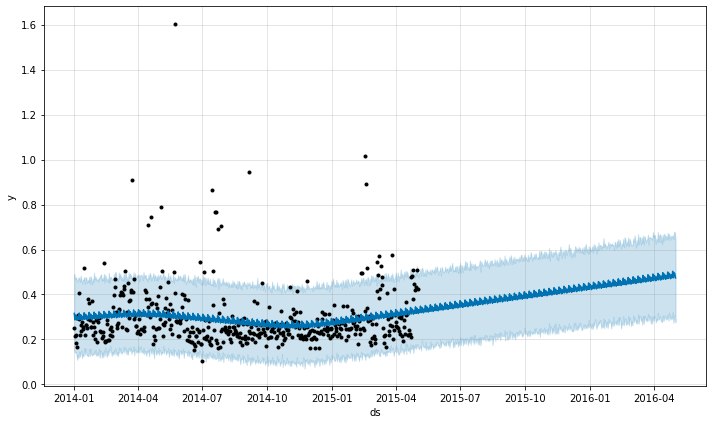

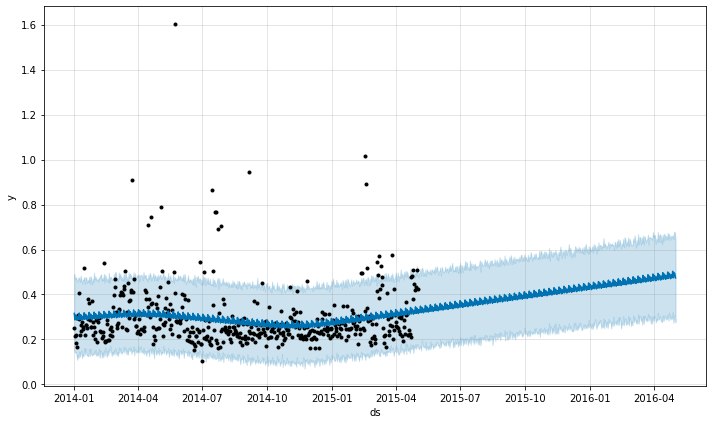

In [29]:
### plot the predicted projection
model.plot(prediction)

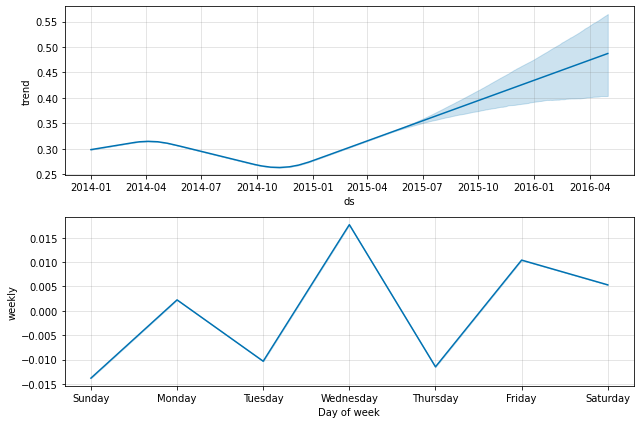

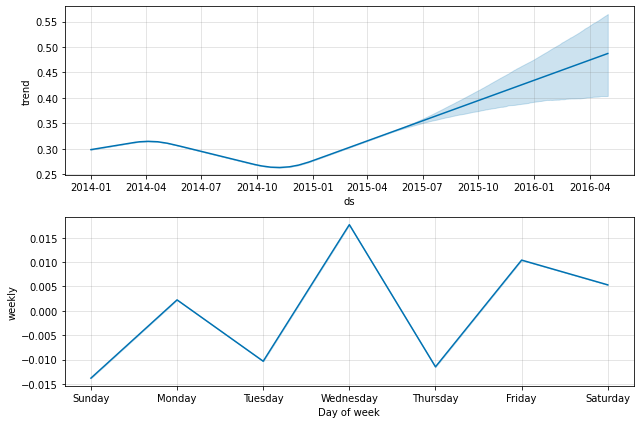

In [30]:
#### Visualize Each Components[Trends,yearly]
model.plot_components(prediction)

In [32]:
df.head()

,ds,y
0,2014-01-01,0.249528
1,2014-01-02,0.216400
2,2014-01-03,0.183814
3,2014-01-04,0.219282
4,2014-01-05,0.165831


In [34]:
from fbprophet.diagnostics import cross_validation
df_cv = cross_validation(model, initial='30 days', period='10 days', horizon = '365 days')
df_cv.head()

INFO:fbprophet:Making 10 forecasts with cutoffs between 2014-02-01 00:00:00 and 2014-05-02 00:00:00


INFO:fbprophet:n_changepoints greater than number of observations. Using 24.


,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2014-02-02,0.284330,0.216668,0.357840,0.188196,2014-02-01
1,2014-02-03,0.284751,0.210378,0.355021,0.296400,2014-02-01
2,2014-02-04,0.348888,0.275621,0.419299,0.276786,2014-02-01
3,2014-02-05,0.356964,0.281954,0.426511,0.296344,2014-02-01
4,2014-02-06,0.255946,0.183917,0.328786,0.297913,2014-02-01


In [35]:
from fbprophet.diagnostics import performance_metrics
df_p = performance_metrics(df_cv)
df_p.head()

,horizon,mse,rmse,mae,mape,mdape,coverage
0,37 days,0.027820,0.166792,0.111189,0.328777,0.285384,0.582192
1,38 days,0.027726,0.166511,0.111599,0.331348,0.285609,0.579452
2,39 days,0.027540,0.165953,0.111582,0.332233,0.287640,0.572603
3,40 days,0.027583,0.166080,0.112125,0.333017,0.289287,0.563014
4,41 days,0.029102,0.170594,0.114945,0.339432,0.297287,0.553425


In [36]:
df_p.head()

,horizon,mse,rmse,mae,mape,mdape,coverage
0,37 days,0.027820,0.166792,0.111189,0.328777,0.285384,0.582192
1,38 days,0.027726,0.166511,0.111599,0.331348,0.285609,0.579452
2,39 days,0.027540,0.165953,0.111582,0.332233,0.287640,0.572603
3,40 days,0.027583,0.166080,0.112125,0.333017,0.289287,0.563014
4,41 days,0.029102,0.170594,0.114945,0.339432,0.297287,0.553425


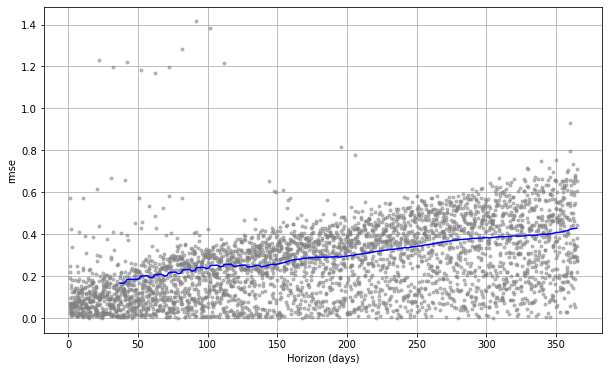

In [37]:
from fbprophet.plot import plot_cross_validation_metric
fig = plot_cross_validation_metric(df_cv, metric='rmse')


In [38]:
import matplotlib.pyplot as plt

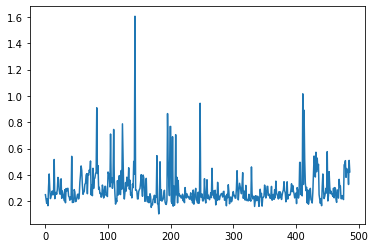

In [39]:
plt.plot(df.iloc[:,1])

In [40]:
from sklearn.preprocessing import MinMaxScaler

In [41]:
df.iloc[:,1]

0      0.249528
1      0.216400
2      0.183814
3      0.219282
4      0.165831
         ...   
482    0.419630
483    0.432996
484    0.326811
485    0.509970
486    0.422551
Name: y, Length: 487, dtype: float64

In [42]:
scaler=MinMaxScaler(feature_range=(0,1))
df=scaler.fit_transform(df.iloc[:,1:])

In [43]:
df.shape

(487, 1)

In [44]:
df

array([[0.09727633],
       [0.07520334],
       [0.05349187],
       [0.07712375],
       [0.0415101 ],
       [0.1366537 ],
       [0.20212597],
       [0.12544482],
       [0.07755545],
       [0.08915552],
       [0.1071943 ],
       [0.11580438],
       [0.09609265],
       [0.10254232],
       [0.27535308],
       [0.07705351],
       [0.10815872],
       [0.10815872],
       [0.09936133],
       [0.12399653],
       [0.18454926],
       [0.17326264],
       [0.12057512],
       [0.10077749],
       [0.10073516],
       [0.17755309],
       [0.07869256],
       [0.11629563],
       [0.10009383],
       [0.08647194],
       [0.06686876],
       [0.12252361],
       [0.05641125],
       [0.12850713],
       [0.11543808],
       [0.12846973],
       [0.12951479],
       [0.09019103],
       [0.08581482],
       [0.06918995],
       [0.08511031],
       [0.07524431],
       [0.29145217],
       [0.05776335],
       [0.05886534],
       [0.05886534],
       [0.1228642 ],
       [0.110

In [45]:
##splitting dataset into train and test split
training_size=int(len(df)*0.65)

In [46]:
training_size

316

In [47]:
test_size=len(df)-training_size

In [48]:
test_size

171

In [49]:
train_data,test_data=df[0:training_size,:],df[training_size:len(df),:1]

In [50]:
test_data

array([[0.07894387],
       [0.1163725 ],
       [0.09825849],
       [0.06977582],
       [0.14439435],
       [0.07609541],
       [0.06719289],
       [0.07294062],
       [0.06603163],
       [0.09917922],
       [0.06847299],
       [0.07505228],
       [0.06447455],
       [0.23763823],
       [0.10181466],
       [0.07608183],
       [0.08482456],
       [0.08975642],
       [0.03775711],
       [0.06662991],
       [0.0922925 ],
       [0.06710768],
       [0.06951805],
       [0.08948363],
       [0.07139332],
       [0.03809202],
       [0.06662852],
       [0.12479968],
       [0.08693559],
       [0.10375659],
       [0.03953273],
       [0.08310719],
       [0.0844773 ],
       [0.08945112],
       [0.14591878],
       [0.12412498],
       [0.08048443],
       [0.09546453],
       [0.13933521],
       [0.13933521],
       [0.09331862],
       [0.10077155],
       [0.08801541],
       [0.07862215],
       [0.09498157],
       [0.1391488 ],
       [0.06937396],
       [0.096

In [51]:
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [52]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 4
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [53]:
X_train.shape, y_train.shape

((311, 4), (311,))

In [54]:
import numpy as np
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0], 4, 1)
X_test = X_test.reshape(X_test.shape[0], 4, 1)

In [55]:
X_train.shape

(311, 4, 1)

In [56]:
### Create the LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [57]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(4,1)))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=1,verbose=1)

Epoch 1/100
311/311 [==============================] - 4s 6ms/step - loss: 0.0095 - val_loss: 0.0063
Epoch 2/100
311/311 [==============================] - 1s 3ms/step - loss: 0.0091 - val_loss: 0.0055
Epoch 3/100
311/311 [==============================] - 1s 4ms/step - loss: 0.0089 - val_loss: 0.0057
Epoch 4/100
311/311 [==============================] - 1s 4ms/step - loss: 0.0091 - val_loss: 0.0055
Epoch 5/100
311/311 [==============================] - 1s 4ms/step - loss: 0.0088 - val_loss: 0.0053
Epoch 6/100
311/311 [==============================] - 1s 3ms/step - loss: 0.0089 - val_loss: 0.0055
Epoch 7/100
311/311 [==============================] - 1s 3ms/step - loss: 0.0090 - val_loss: 0.0054
Epoch 8/100
311/311 [==============================] - 1s 4ms/step - loss: 0.0090 - val_loss: 0.0056
Epoch 9/100
311/311 [==============================] - 1s 3ms/step - loss: 0.0089 - val_loss: 0.0052
Epoch 10/100
311/311 [==============================] - 1s 4ms/step - loss: 0.0087 - val_lo

In [58]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

In [59]:
test_predict

array([[0.09684897],
       [0.12450221],
       [0.10096097],
       [0.09255983],
       [0.09392975],
       [0.10800566],
       [0.11802936],
       [0.10525542],
       [0.10789949],
       [0.09866919],
       [0.12500805],
       [0.12170613],
       [0.08037563],
       [0.1085782 ],
       [0.10428546],
       [0.08948983],
       [0.10956892],
       [0.11571208],
       [0.11902066],
       [0.10764655],
       [0.10928846],
       [0.10883844],
       [0.09491565],
       [0.11430575],
       [0.12100141],
       [0.11857384],
       [0.11458229],
       [0.07132904],
       [0.10966343],
       [0.10612342],
       [0.12072615],
       [0.12225859],
       [0.12522778],
       [0.10232124],
       [0.10451915],
       [0.12145825],
       [0.13049887],
       [0.11544271],
       [0.1099373 ],
       [0.10132708],
       [0.09948885],
       [0.10633679],
       [0.11975616],
       [0.10143621],
       [0.10376097],
       [0.10367512],
       [0.10411827],
       [0.117

In [60]:
##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [61]:
test_predict

array([[0.24888633],
       [0.2903895 ],
       [0.25505778],
       [0.24244899],
       [0.24450502],
       [0.26563075],
       [0.28067476],
       [0.26150307],
       [0.2654714 ],
       [0.25161818],
       [0.29114866],
       [0.286193  ],
       [0.2241624 ],
       [0.26649004],
       [0.26004732],
       [0.2378414 ],
       [0.26797697],
       [0.2771969 ],
       [0.28216255],
       [0.2650918 ],
       [0.26755604],
       [0.26688063],
       [0.24598472],
       [0.2750862 ],
       [0.28513533],
       [0.28149194],
       [0.27550125],
       [0.2105849 ],
       [0.2681188 ],
       [0.26280582],
       [0.2847222 ],
       [0.28702217],
       [0.29147846],
       [0.25709936],
       [0.26039806],
       [0.285821  ],
       [0.29938954],
       [0.2767926 ],
       [0.26852983],
       [0.25560725],
       [0.25284836],
       [0.26312608],
       [0.28326643],
       [0.25577104],
       [0.25926015],
       [0.2591313 ],
       [0.2597964 ],
       [0.279

In [62]:
y_train.shape,train_predict.shape,train_predict

((311,), (311, 1), array([[0.26472083],
        [0.26254487],
        [0.2994386 ],
        [0.27642977],
        [0.31494144],
        [0.23977797],
        [0.26435786],
        [0.2663408 ],
        [0.27951798],
        [0.27028072],
        [0.2697369 ],
        [0.33560047],
        [0.28520352],
        [0.22114266],
        [0.27745727],
        [0.27317595],
        [0.28607056],
        [0.32431477],
        [0.3579792 ],
        [0.33032465],
        [0.29050016],
        [0.2769027 ],
        [0.31714126],
        [0.27011204],
        [0.26982555],
        [0.26871237],
        [0.26238114],
        [0.23671125],
        [0.27801755],
        [0.24556543],
        [0.2875472 ],
        [0.26854494],
        [0.29659632],
        [0.308774  ],
        [0.2700924 ],
        [0.2510023 ],
        [0.2379239 ],
        [0.2627489 ],
        [0.25997534],
        [0.2944423 ],
        [0.26153454],
        [0.17515488],
        [0.26033032],
        [0.29171816],
        [0.277

In [63]:
### Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

0.18358811709959558

In [64]:
### Test Data RMSE
math.sqrt(mean_squared_error(ytest,test_predict))

0.18499390035671373

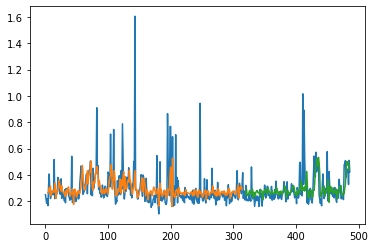

In [68]:
### Plotting 
# shift train predictions for plotting
lookback=4
trainPredictPlot = numpy.empty_like(df)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[lookback:len(train_predict)+lookback, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(lookback*2)+1:len(df)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()